<header style="width: 100%; background-color: #eaeaea;">
    <br>
    <h1 style="text-align: center;">Praktikum Metode Seismik: Pertemuan 2</h1>
    <br>
    <br>
</header>

## Overview
1. [Tranformasi Fourier Diskrit](#Tranformasi-Fourier-Diskrit)
    * [Deret Fourier](#Deret-Fourier)
        * [Contoh Deret Fourier](#Contoh-Deret-Fourier)
    * [Transformasi Fourier](#Transformasi-Fourier)
        * [Pseudocode DFT](#Pseudocode-DFT)
        * [Contoh DFT](#Contoh-DFT)
    * [Invers Transformasi Fourier](#Invers-Transformasi-Fourier)
        * [Pseudocode IDFT](#Pseudocode-IDFT)
        * [Contoh IDFT](#Contoh-IDFT)
    * [Time Complexity DFT](#Time-Complexity-DFT)
2. [Transformasi Fourier Cepat](#Transformasi-Fourier-Cepat)
    * [Transformasi Fourier Cepat Maju (FFT)](#Transformasi-Fourier-Cepat-Maju-(FFT))
    * [Invers Transformasi Fourier Cepat (IFFT)](#Invers-Transformasi-Fourier-Cepat-(IFFT))
    * [Time Complexity FFT](#Time-Complexity-FFT)
3. [Transformasi Fourier 2D](#Transformasi-Fourier-2D)
    * [Dasar Transformasi Fourier 2D](#Dasar-Transformasi-Fourier-2D)
    * [Transformasi Fourier Cepat Maju 2D (FFT)](#Transformasi-Fourier-Cepat-Maju-2D-(FFT))
    * [Invers Transformasi Fourier Cepat Maju 2D (IFFT)](#Invers-Transformasi-Fourier-Cepat-Maju-2D-(IFFT))

## Tranformasi Fourier Diskrit
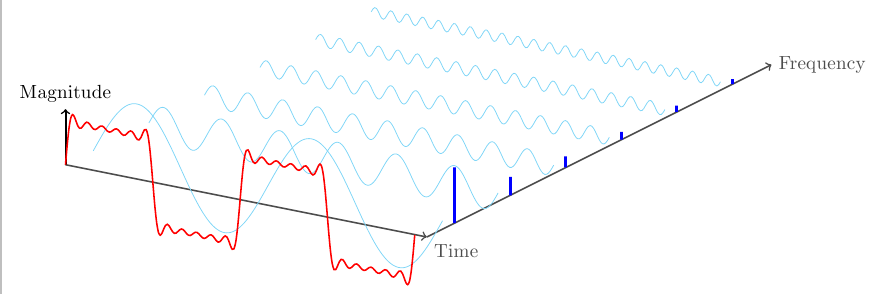

### Deret Fourier

> **Jean Baptiste Joseph Fourier (1768 - 1830)**, membuktikan bahwa `sembarang fungsi periodik dapat direpresentasikan sebagai penjumlahan sinyal-sinyal sinus dan kosinus` dengan frekuensi tertentu $$f(t + T) = f(t)$$

Uraian persamaan deret fourier
$$f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} [a_n cos (n t) + b_n sin (n t)]$$
Dengan koefisien fourier $a_0, a_n,$ dan $b_n$
$$a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(t) dt$$
$$a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(t) cos (n t) dt$$
$$b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(t) sin (n t) dt$$

#### Contoh Deret Fourier

Diketahui:
$$
\begin{align}
f(t)=
\begin{cases}
0&\text{jika $-\pi \leq a < 0$}\\
1&\text{jika $0 \leq a < \pi$}\\
\end{cases}
\end{align}
$$

Dengan
$$f(t + 2\pi) = f(t)$$

Solusi
$$f(t) = \frac{1}{2} + \sum_{n=0}^{\infty}  \frac{2}{\pi n} sin (n t)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.arange(-2*np.pi, 2*np.pi+0.01, 0.01)
T = 2*np.pi

def squareWave(x):
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = 0

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = 0
                negativeOne = 1
            else:
                one = 1
                negativeOne = 0

# fungsi ganjil
def bn(n):
    if (n%2 != 0):
        return 2/(np.pi*n)
    else:
        return 0

# omega_n
def wn(n):
    wn = (2*np.pi*n)/T
    return wn


def fourierSeries(t,n_max):
    a0 = 1/2
    y = a0
    for n in range(0,n_max):
        y = y + bn(n) * np.sin(wn(n)*t)
    return y

n = 10
y = []
ft = []

for i in t:
    y.append(squareWave(i))
    ft.append(fourierSeries(i,n))

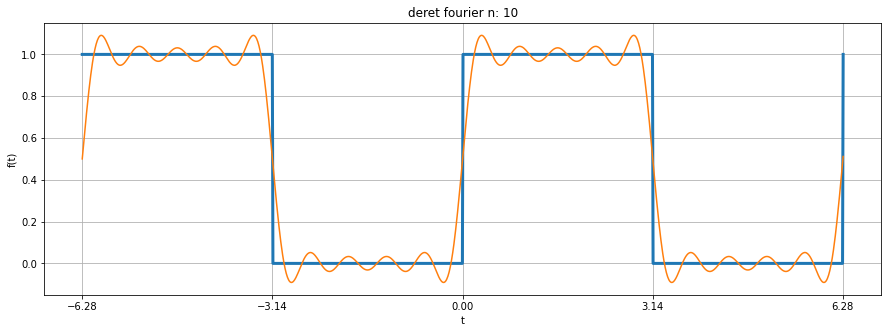

In [3]:
plt.figure(figsize=(15,5))
plt.plot(t,y, linewidth=3)
plt.plot(t,ft)
plt.title(f'deret fourier n: {n}')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.gca().xaxis.set_major_locator(plt.matplotlib.ticker.MultipleLocator(base=np.pi))
plt.grid()
plt.show()

### Transformasi Fourier
> Merupakan transformasi yang dapat mengubah sinyal dalam domain waktu s(t) kedalam domain frekuensi s(f). Tujuanya adalah untuk mengetahui apakah suatu sinyal mempunyai frekuensi tertentu atau tidak

Secara kontinyu
$$X(f) = \int_{-\infty}^\infty x(t)e^{-j2\pi ft} dt$$
Secara diskrit (DTFT)
$$X(f) = \sum_{n=-\infty}^{\infty} x(nT_s) e^{-j2\pi f nT_s}$$
**Transformasi fourier diskrtit (DFT)**
$$X(k) = \sum_{n=0}^{N-1} x(n) e^{-j\omega n}$$
dimana $e$ dan $\omega$  adalah
$$e^{\pm j\omega n}=cos(\omega n) \pm j sin(\omega n)$$

$$\omega=\frac{2\pi k}{N}$$

#### Pseudocode DFT
``` python
function DFT(x: array of real number) -> array of imaginary number
    # Deklarasi variabel
    N = length of x
    X = N length of zero array
    j = sqrt(-1)
    
    # Algoritma
    for k from 0 to N:
        for n from 0 to N:
            X[k] += x[n] * (exp((-j * 2 * pi * k * n) / N))
        end for
    end for
    
    return X
```

#### Contoh DFT

In [4]:
import math
from cmath import sqrt

def DFT(x):
    # Deklarasi variabel
    N = len(x)
    X = [0]*N
    j = sqrt(-1)
    
    # Algoritma
    for k in range(0,N):
        for n in range(0,N):
            X[k] += x[n]*(np.exp((-j* 2 * np.pi * k * n)/N))

    return X

In [5]:
fs = 1000 # frekuensi cuplikan

start = 0
end = 1
step = 1/fs

times = np.arange(start,end+step,step)

f = 2
sinus = np.sin(2*np.pi*f*times)

fn = 500    # frekuensi nyquist
            # silahkan diubah-ubah dan amati dengan hasil DFT nya

tc = np.arange(0,1+(1/(fn*f)),1/(fn*f))
yc = np.sin(2*np.pi*f*tc)
print(len(yc))
print(len(sinus))

1001
1001


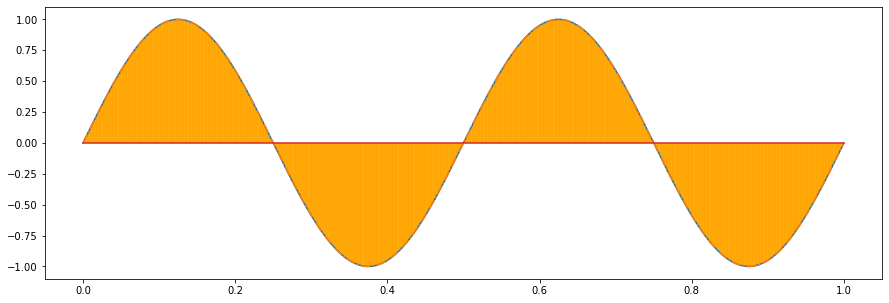

In [6]:
plt.figure(figsize=(15,5))
plt.plot(times,sinus)
plt.stem(tc,yc,'orange', markerfmt='-.',use_line_collection=True)
plt.show()

In [7]:
from timeit import default_timer as timer
from datetime import timedelta

start = timer()

# x = [0,1,2,3]
# result = DFT(x)
result = DFT(yc)

end = timer()
duration = end-start
print(f'duration: {timedelta(seconds=duration)}')

duration: 0:00:07.300957


In [8]:
# print(result)

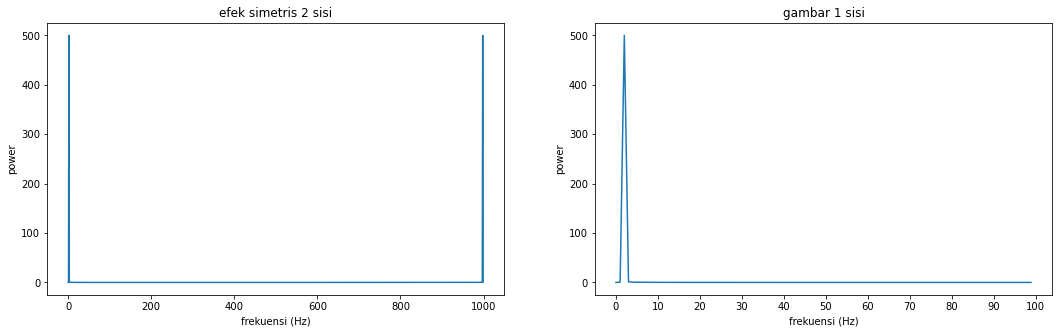

In [9]:
f1 = fs * np.arange(0,len(result))/len(result)
f2 = fs * np.arange(0,len(result)//10)/len(result)

fig,ax = plt.subplots(1,2, figsize = (18,5))
ax[0].set_title('efek simetris 2 sisi')
ax[0].plot(f1,np.abs(result))
ax[0].set_xlabel('frekuensi (Hz)')
ax[0].set_ylabel('power')

ax[1].set_title('gambar 1 sisi')
ax[1].plot(f2,np.abs(result[:len(result)//10]))
ax[1].set_xlabel('frekuensi (Hz)')
ax[1].set_ylabel('power')
ax[1].set_xticks(np.arange(0,100+10, 10))
plt.show()

In [10]:
# print(f'frekuensi: {f}')
# print(f'power: {np.abs(result[:len(result)//10])}')

### Invers Transformasi Fourier
**Invers transformasi fourier diskrtit (IDFT)**
$$x(n) = \sum_{k=0}^{N-1} \frac{1}{N} X(k) e^{j\omega n}$$

#### Pseudocode IDFT
``` python
function IDFT(X: array of imaginary number) -> array of imaginary number
    # Deklarasi variabel
    N = length of X
    x = N length of zero array
    j = sqrt(-1)
    
    # Algoritma
    for n from 0 to N:
        for k from 0 to N:
            x[n] += 1/N * X[k] * (exp((j * 2 * pi * k * n) / N))
        end for
    end for
    
    return x
```

#### Contoh IDFT

In [11]:
def IDFT(X):
    # Deklarasi variabel
    N = len(X)
    x = [0]*N
    j = sqrt(-1)
    
    # Algoritma
    for n in range(0,N):
        for k in range(0,N):
            x[n] += 1/N*X[k]*(np.exp((j* 2 * np.pi * k * n)/N))

    return x

In [12]:
start2 = timer()

result2 = IDFT(result)

end2 = timer()
duration2 = end2-start2
print(f'duration: {timedelta(seconds=duration2)}')

duration: 0:00:05.293534


In [13]:
# print(result2)

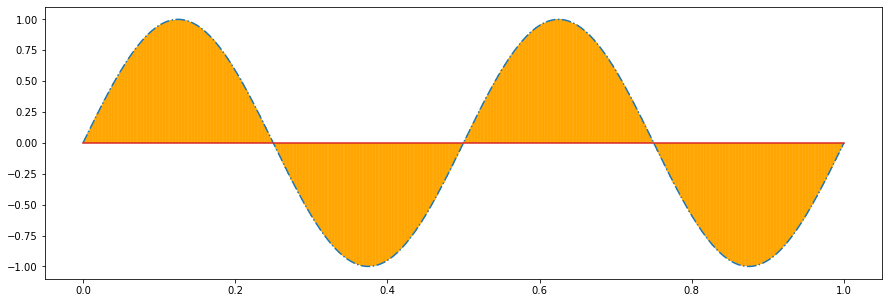

In [14]:
plt.figure(figsize=(15,5))
plt.stem(tc,[v.real for v in result2],'orange', markerfmt='-.',use_line_collection=True)
plt.show()

### Time Complexity DFT
> Kompleksitas Waktu dari suatu algoritma atau kode tidak sama dengan waktu sebenarnya yang diperlukan untuk mengeksekusi kode tertentu tetapi menyatakan berapa kali sebuah pernyataan dieksekusi.

Komplesitas waktu untuk algoritma DFT adalah $O(n^2)$. Banyak eksekusi kode yang diperlukan untuk 2 sampel data adalah 4 kali atau untuk 10 sample data adalah 100 kali, begitu seterusnya. Akibatnya waktu perhitungan juga akan semakin lambat.

## Transformasi Fourier Cepat
> Fast Fourier
Transform (FFT) adalah suatu algoritma untuk menghitung transformasi Fourier diskrit (Discrete Fourier
Transform, DFT) dengan cepat dan efisien. `Algoritma FFT yang populer digunakan adalah algoritma Cooley-Tukey (1960)`

### Transformasi Fourier Cepat Maju (FFT)

In [15]:
from scipy.fft import fft, ifft, fft2, ifft2

In [16]:
start3 = timer()

fft1 = fft(result)

end3 = timer()
duration3 = end3-start3
print(f'duration: {timedelta(seconds=duration3)}')

duration: 0:00:00.004607


In [17]:
print(fft1)

[-1.16696319e-10-1.22887762e-10j -4.44703163e-11-1.67449803e-10j
 -1.25786059e+01-1.49835493e-11j ...  3.77278729e+01-5.16243531e-11j
  2.51552255e+01-8.45620704e-11j  1.25786059e+01-1.45256253e-10j]


### Invers Transformasi Fourier Cepat (IFFT)

In [18]:
start4 = timer()

ifft1 = ifft(fft1)

end4 = timer()
duration4 = end4-start4
print(f'duration: {timedelta(seconds=duration3)}')

duration: 0:00:00.004607


In [19]:
print(ifft1)
print(ifft1.real)

[ 1.13764919e-13+3.46035846e-27j  2.08879464e-03-6.65546682e-01j
  3.13998132e+00-5.00236722e+02j ... -1.13277181e-02-1.20307458e+00j
  3.13998132e+00+5.00236722e+02j  2.08879464e-03+6.65546682e-01j]
[ 1.13764919e-13  2.08879464e-03  3.13998132e+00 ... -1.13277181e-02
  3.13998132e+00  2.08879464e-03]


### Time Complexity FFT

Komplesitas waktu untuk algoritma DFT adalah $O(n \ log(n))$. Banyak eksekusi kode yang diperlukan untuk 2 sampel data adalah 0.60205 kali atau untuk 10 sample data adalah 10 kali, begitu seterusnya. Algoritma fft lebih efesien dalam kecepatan eksekusi kode sehingga tidak membutuhkan waktu lama dalam pemrosesan datanya.

## Transformasi Fourier 2D

In [20]:
from scipy.signal import convolve

In [21]:
def ricker(f,tn,dt):
    t = np.arange(-tn/2,tn/2+dt,dt)/1000
    w = (1-2*np.pi**2*f**2*t**2)*np.exp(-np.pi**2*f**2*t**2)
    return t, w

dt = 4
ntraces = 5 # banyak geophone
ns = 200 # lama waktu

t,w = ricker(10,100,dt)  #freq, length, sr f15

In [22]:
ref = [] # reflektivitas
traces = []
for i in range(ntraces):
    R = np.zeros(ns)
    R[52+(i*20)] = -0.7
    R[50] = 0.8
    tr = convolve(R,w, mode = 'same') # konvolusi antara reflektivitas dengan ricker wavelet
    ref.append(R)
    traces.append(tr)

In [23]:
print(len(traces))

5


[1 2 3 4 5]


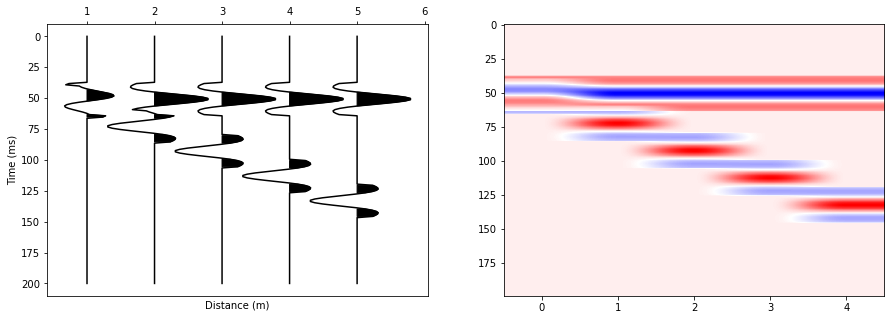

In [24]:
fig,ax = plt.subplots(1,2, figsize = (15,5))

offset = np.arange(1,5+1,1)
print(offset)
y1 = np.linspace(0.,200.,200)

for i in range(ntraces):
    r = np.transpose(traces[i]) + offset[i]
    ax[0].plot(r,y1,'k-')
    ax[0].fill_betweenx(y1,offset[i],r,where=(r>offset[i]),color='k')

ax[0].xaxis.set_ticks_position('top')
ax[0].invert_yaxis()
ax[0].set_xlabel("Distance (m)")
ax[0].set_ylabel("Time (ms)")

ax[1].imshow(np.transpose(traces), aspect = 'auto', cmap='bwr_r')
plt.show()

### Dasar Transformasi Fourier 2D
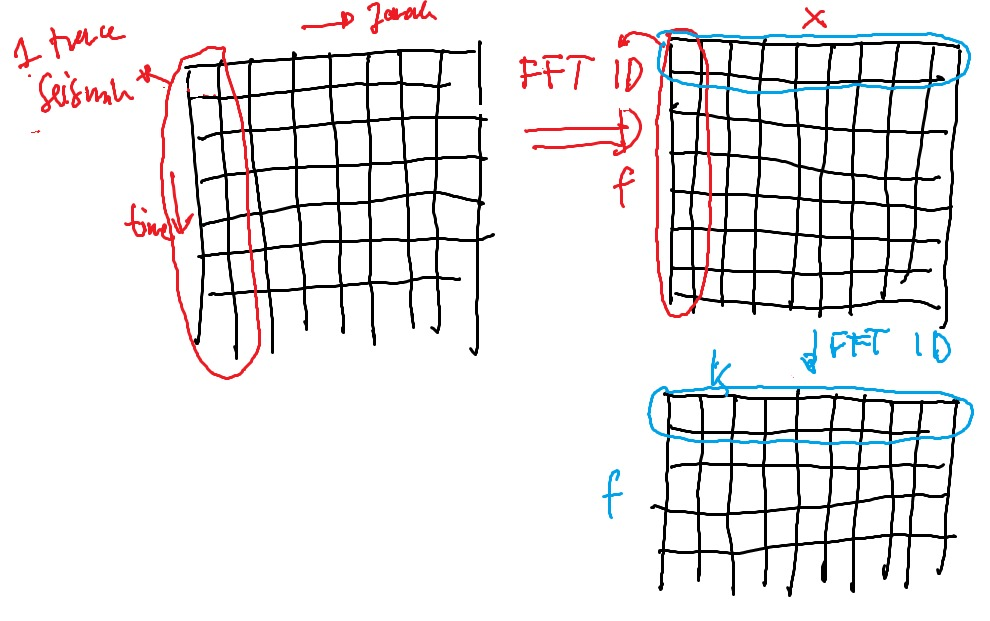

In [25]:
vertikal = fft(traces)
horizontal = fft(np.transpose(vertikal))

In [26]:
# print(vertikal)
# print(horizontal)

### Transformasi Fourier Cepat Maju 2D (FFT)

In [27]:
fft2d = fft2(traces)
# print(np.transpose(fft2d))

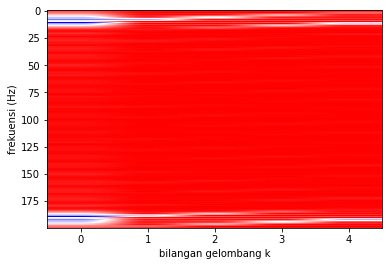

In [31]:
plt.imshow(np.transpose(np.abs(fft2d)), aspect = 'auto', cmap='bwr_r')
# plt.plot(fft2d.real)
plt.xlabel('bilangan gelombang k')
plt.ylabel('frekuensi (Hz)')
plt.show()

### Invers Transformasi Fourier Cepat Maju 2D (IFFT)

In [29]:
ifft2d = ifft2(fft2d)

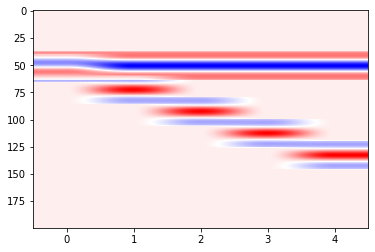

In [30]:
plt.imshow(np.transpose(ifft2d.real), aspect = 'auto', cmap='bwr_r')
plt.show()

<footer style="width: 100%; background-color: #eaeaea;">
    <br>
    <p style="text-align: center;">Made with 🚀 2021 Yusuf Umar Al Hakim. All Rights Reserved</p>
    <br>
</footer>